<a href="https://colab.research.google.com/github/Phnasc/ai-and-machine-learning/blob/main/simple_digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digit Recognition Neural Network
This project demonstrates a simple neural network implementation using numpy to recognize hand-written digits from the MNIST dataset. The code consists of various components to load, preprocess, train, and evaluate the model.

* The provided code encapsulates a neural network model within the
NeuralNetwork class. It defines hyperparameters like hidden_layer_size, learning_rate, and iterations, initializing model parameters. The forward propagation computes layer activations with ReLU and softmax functions. Backpropagation computes gradients for parameter updates using chain rule, and the training loop executes gradient descent to optimize parameters. The model's accuracy is monitored during training

* **Foward Propagation:**

\begin{align}
\mathbf{Z}^{[1]} &= \mathbf{W}^{[1]}\mathbf{X} + \mathbf{b}^{[1]} \\
\mathbf{A}^{[1]} &= g_{\text{ReLU}}(\mathbf{Z}^{[1]}) \\
\mathbf{Z}^{[2]} &= \mathbf{W}^{[2]}\mathbf{A}^{[1]} + \mathbf{b}^{[2]} \\
\mathbf{A}^{[2]} &= g_{\text{softmax}}(\mathbf{Z}^{[2]})
\end{align}

* **Backward Propagation:**

\begin{align*}
dZ^{[2]} &= A^{[2]} - Y \\
dW^{[2]} &= \frac{1}{m} dZ^{[2]} A^{[1]T} \\
dB^{[2]} &= \frac{1}{m} \sum dZ^{[2]} \\
dZ^{[1]} &= W^{[2]T} dZ^{[2]} \odot g[1]'(Z^{[1]}) \\
dW^{[1]} &= \frac{1}{m} dZ^{[1]} A^{[0]T} \\
dB^{[1]} &= \frac{1}{m} \sum dZ^{[1]} \\
\end{align*}
\

* **Parameter updates**

\begin{align*}
W^{[2]} &:= W^{[2]} - \alpha dW^{[2]} \\
b^{[2]} &:= b^{[2]} - \alpha db^{[2]} \\
W^{[1]} &:= W^{[1]} - \alpha dW^{[1]} \\
b^{[1]} &:= b^{[1]} - \alpha db^{[1]} \\
\end{align*}


where *alpha* is the learning rate.



Iteration: 0, Accuracy: 7.29%
Iteration: 10, Accuracy: 52.18%
Iteration: 20, Accuracy: 64.97%
Iteration: 30, Accuracy: 71.13%
Iteration: 40, Accuracy: 74.63%
Iteration: 50, Accuracy: 77.14%
Iteration: 60, Accuracy: 78.89%
Iteration: 70, Accuracy: 80.29%
Iteration: 80, Accuracy: 81.38%
Iteration: 90, Accuracy: 82.25%
Iteration: 100, Accuracy: 82.95%
Iteration: 110, Accuracy: 83.59%
Iteration: 120, Accuracy: 84.13%
Iteration: 130, Accuracy: 84.64%
Iteration: 140, Accuracy: 85.09%
Iteration: 150, Accuracy: 85.50%
Iteration: 160, Accuracy: 85.89%
Iteration: 170, Accuracy: 86.16%
Iteration: 180, Accuracy: 86.45%
Iteration: 190, Accuracy: 86.71%
Iteration: 200, Accuracy: 87.01%
Iteration: 210, Accuracy: 87.27%
Iteration: 220, Accuracy: 87.53%
Iteration: 230, Accuracy: 87.74%
Iteration: 240, Accuracy: 87.94%
Iteration: 250, Accuracy: 88.14%
Iteration: 260, Accuracy: 88.31%
Iteration: 270, Accuracy: 88.47%
Iteration: 280, Accuracy: 88.60%
Iteration: 290, Accuracy: 88.75%
Iteration: 300, Accura

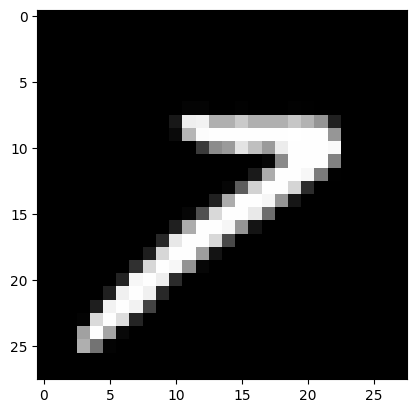

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Defining a class for the Neural Network
class NeuralNetwork:
    def __init__(self, hidden_layer_size, learning_rate, iterations):
        # Initializing hyperparameters
        self.hidden_layer_size = hidden_layer_size
        self.learning_rate = learning_rate
        self.iterations = iterations

    def load_data(self, file_path):
        # Loading and preprocessing data
        data = pd.read_csv(file_path)
        data = np.array(data)
        np.random.shuffle(data)

        m, n = data.shape
        # Splitting data into development and training sets
        data_dev = data[:1000].T
        self.Y_dev = data_dev[0]
        self.X_dev = data_dev[1:n] / 255.

        data_train = data[1000:m].T
        self.Y_train = data_train[0]
        self.X_train = data_train[1:n] / 255.

    def init_params(self):
        # Initializing model parameters
        self.W1 = np.random.rand(self.hidden_layer_size, 784) - 0.5
        self.b1 = np.random.rand(self.hidden_layer_size, 1) - 0.5
        self.W2 = np.random.rand(10, self.hidden_layer_size) - 0.5
        self.b2 = np.random.rand(10, 1) - 0.5

    # ReLU activation function
    def ReLU(self, Z):
        return np.maximum(Z, 0)

    # Softmax activation function
    def softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z))  # Avoiding numerical instability
        return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

    # Forward propagation
    def forward_prop(self, X):
        Z1 = self.W1.dot(X) + self.b1
        A1 = self.ReLU(Z1)
        Z2 = self.W2.dot(A1) + self.b2
        A2 = self.softmax(Z2)
        return Z1, A1, Z2, A2

    # ReLU derivative
    def ReLU_deriv(self, Z):
        return Z > 0

    # Converting labels to one-hot encoded format
    def one_hot(self, Y):
        one_hot_Y = np.zeros((Y.size, Y.max() + 1))
        one_hot_Y[np.arange(Y.size), Y] = 1
        return one_hot_Y.T

    # Backpropagation
    def backward_prop(self, Z1, A1, Z2, A2, X, Y):
        one_hot_Y = self.one_hot(Y)
        dZ2 = A2 - one_hot_Y
        dW2 = 1 / self.X_train.shape[1] * dZ2.dot(A1.T)
        db2 = 1 / self.X_train.shape[1] * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = self.W2.T.dot(dZ2) * self.ReLU_deriv(Z1)
        dW1 = 1 / self.X_train.shape[1] * dZ1.dot(X.T)
        db1 = 1 / self.X_train.shape[1] * np.sum(dZ1, axis=1, keepdims=True)
        return dW1, db1, dW2, db2

    # Parameter update
    def update_params(self, dW1, db1, dW2, db2):
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    # Getting predictions from output layer
    def get_predictions(self, A2):
        return np.argmax(A2, axis=0)

    # Calculating accuracy
    def get_accuracy(self, predictions, Y):
        return np.sum(predictions == Y) / Y.size

    # Gradient Descent training loop
    def gradient_descent(self):
        self.init_params()
        for i in range(self.iterations):
            Z1, A1, Z2, A2 = self.forward_prop(self.X_train)
            dW1, db1, dW2, db2 = self.backward_prop(Z1, A1, Z2, A2, self.X_train, self.Y_train)
            self.update_params(dW1, db1, dW2, db2)
            if i % 10 == 0:
                predictions = self.get_predictions(A2)
                accuracy = self.get_accuracy(predictions, self.Y_train)
                print(f"Iteration: {i}, Accuracy: {accuracy:.2%}")

    # Making predictions
    def make_predictions(self, X):
        _, _, _, A2 = self.forward_prop(X)
        predictions = self.get_predictions(A2)
        return predictions

    # Testing a single prediction
    def test_prediction(self, index):
        current_image = self.X_train[:, index, None]
        prediction = self.make_predictions(self.X_train[:, index, None])
        label = self.Y_train[index]

        print("Prediction:", prediction)
        print("Label:", label)

        current_image = current_image.reshape((28, 28)) * 255
        plt.gray()
        plt.imshow(current_image, interpolation='nearest')
        plt.show()

    # Evaluating development set accuracy
    def evaluate_dev_set(self):
        dev_predictions = self.make_predictions(self.X_dev)
        accuracy = self.get_accuracy(dev_predictions, self.Y_dev)
        print(f"Development Set Accuracy: {accuracy:.2%}")

# Main execution block
if __name__ == "__main__":
    # Creating an instance of the NeuralNetwork class
    neural_net = NeuralNetwork(hidden_layer_size=128, learning_rate=0.1, iterations=500)

    # Loading data
    neural_net.load_data('/content/train.csv')

    # Training the neural network
    neural_net.gradient_descent()

    # Evaluating on the development set
    neural_net.evaluate_dev_set()

    # Testing a single prediction
    neural_net.test_prediction(index=0)


1. **Accuracy Progression:** The displayed accuracy percentages illustrate the improvement in the model's performance as training iterations advance. At the beginning, the accuracy is around **7.29%**, which is essentially random guessing since there are 10 classes (digits 0 to 9). However, as the iterations increase, the accuracy rises steadily, reaching an accuracy of 90.75% on the training set by the last iteration.

2. **Development Set Accuracy:** The accuracy achieved on the development set is a notable **90.90%**, which aligns closely with the accuracy we got on the training set. This indicates that the model is performing consistently and has learned patterns in the data rather than merely memorizing the training examples.